# A/B тест нового формата промо акций в интернет магазине Четыре Лапы


На сайте интернет-магазина Четыре Лапы тестируется новый формат промо-акций. Для оценки разницы был запущен и проведен АБ-тест.

<b>Гипотезы: улучшение конверсии и выручки в тестовой группе на 10%.</b>

<b>Описание эксперимента:</b>
Группы: 0 — контрольная, 1 — новый формат промо-акций.


<b>Старт теста</b> – 01.08.2022 
<b>конец</b> – 21.08.2022


<b>Описание данных:</b>

ab_users https://drive.google.com/file/d/1kzYDj9LZF7ZjkPcKgcmT2_IJ5xx7FWCh/view?usp=sharing
- user_id – идентификатор пользователя
- exp_group – группа пользователя

ab_orders https://drive.google.com/file/d/1PU_VYdnojRq4upj5_ryFgCq_pzEquExG/view?usp=sharing
- user_id – идентификатор пользователя
- session_id – идентификатор сессии
- date – дата сессии
- order_id – идентификатор заказа
- revenue – сумма чека
- quantity – количество позиций в чеке

ab_funnel https://drive.google.com/file/d/1zRXX6IMMtBRvomCwDSHfxCDZk-qRj7Kl/view?usp=sharing
- user_id – идентификатор пользователя
- session_id – идентификатор сессии
- date – дата сессии
- session_start – количество событий “начало сессии”
- view_item – количество событий “просмотр товаров”
- add_to_cart – количество событий “добавление товаров в корзину”
- view_cart – количество событий “просмотр корзины”
- checkout – количество событий “чекаут”



## Решение 

Считаем, что с начала теста все пользователи (или хотя бы большинство увидели информацию о промоакции), так как у нас нет информации о том, в какой именно сессии был просмотр промоакции. 

Так как история с промоакциями может повлить на поведение пользователя в целом, то разумно было бы смотреть на метрики в <b>разрезе по пользователям</b>. 

В задаче нет информации на каком этапе пользователь узнает о промо акции, то, как я уже написала, будем считать, что пользователь по умолчанию о ней знает. Из этого следует, что улучшенная промо акция должна положительно сказаться на всех этапах воронки. 
Главным образом, ожидаем положительно влияние за заказы: ожидаем что мы привлекли как и новую аудиторию в заказы, так и частоту заказов на пользователя, а также что положительно повлияли на доход в целом и на доход с одного платящего пользователя. 

<b>Ключевые метрики</b>: 
- <b>CR в оформление заказа</b> = заказы / все юзеры (смотрим на общую конверсию, удалось ли нам увеличить заказы)
- <b> CR в уникальное добавление заказа</b> = юзеры с заказом / все юзеры (проверяем привлекли мы новую аудиторию, которая оформляет заказы)
- <b>Частота заказов на пользователя</b> = Заказы / юзеры с заказом (проверяем удалось ли повлиять на частоту совершения заказов пользователем)
- <b>CR в заказ из просмотра карточки товара</b> = Заказы / юзеры с просмотром карточки товара (возможно, в этой метрике будет меньше шума в виде случайных пользователей, у которых нет интереса в товарах)
- <b>ARPU</b> = Доход / все юзеры (проверяем удалось ли увеличить доход в целом)
- <b>ARPPU</b> = Доход / юзеры с заказом (проверяем увеличился ли доход на платящего пользователя)
- <b>AOV</b> = Доход / Заказы (проверяем увеличился ли средний чек заказа)
- <b>Строчность чека</b> =  Количество позиций в чеке / заказы (проверяем стали ли пользователи заказывать больше товаров в заказе)
- <b>CR в заказ из чекаута</b> (проверим на всякий случай нет ли тут проблем, это важный этап, ожидаем что изменений нет)

<b>Вспомогательные метрики: </b>
- <b>CR в заказ из просмотра корзины</b> = Заказы / юзеры с просмотром корзины (возможно, заходя в корзину и видя, что сумма заказов с применением промо акций стала меньше, пользователи станут оформлять заказ из просмотра корзины более охотно)
- <b>Частота сессий на пользователя</b> (проверим стали ли пользователи чаще заходить на сайт, может быть они станут ждать новые промоакции, можно посмотреть в разрезе по заказывающим и не заказывающим пользователям)
- <b>CR в чекаут, CR в чекаут из просмотра корзины, CR в чекаут из просмотра карточки товара</b>
- <b>CR в добавление в корзину, строчность корзины, CR в уникальное добавление в корзину</b>
- <b>CR просмотр карточки товра, CR в уникальный просмотр карточки товара, Частота просмотра карточки товара </b>

В этом ноутбуке я расчитаю только ключевые метрики (думаю, для проверки моих навыков и для проверки гипотезы этого хватит), но в реальном мире, конечно, лучше считать и вспомогательные метрики тоже, потому что никогда не знаешь как может сказаться фича на том или ином участке продукта. 


Так как данные уже собраны, то необходимый для теста размер выборки определять не будем. Будем ориентироваться уже на полученные статистические оценки значимости.



In [417]:
import pandas as pd




## Чтение таблиц и предобработка данных
- проверка на пропуски 
- проверка на тип данных 
- проверка на дубли
- оставить только нужные строки, которые попули в тест и добавить в каждую таблицу информацию о варианте


Прочитаем таблицы и посмотрим информацию о них

In [418]:
print('users')
users_df = pd.read_csv('ab_users.csv')
display(users_df.head())
display(users_df.info())

print('orders')
orders_df = pd.read_csv('ab_orders.csv')
display(orders_df.head())
display(orders_df.info())

print('funnel')
funnel_df = pd.read_csv('ab_funnel.csv')
display(funnel_df.head())
display(funnel_df.info())



users


,user_id,exp_group
0,Cm2XGglQiQ,0
1,6xKKzzUusS,0
2,GFPa8kZ2jq,0
3,ZJPyOexDEj,0
4,d4dCCiLqwB,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20936 entries, 0 to 20935
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    20936 non-null  object
 1   exp_group  20936 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 327.2+ KB


None

orders


,user_id,session_id,date,order_id,revenue,quantity
0,rEkAR4M1c9,129593393,2022-08-02,GMglo,450,1
1,EVa7Ha0RgW,129592657,2022-08-02,sOBcz,523,1
2,QxOalzAOLz,129593698,2022-08-02,9ImAP,533,1
3,bUJ8tIuYcQ,129593960,2022-08-02,mqP1o,244,1
4,zPiU9Tklne,129594242,2022-08-02,meJuu,353,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     2286 non-null   object
 1   session_id  2286 non-null   int64 
 2   date        2286 non-null   object
 3   order_id    2286 non-null   object
 4   revenue     2286 non-null   int64 
 5   quantity    2286 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 107.3+ KB


None

funnel


,user_id,session_id,date,session_start,view_item,add_to_cart,view_cart,checkout
0,abvJQTY5JY,129590909,2022-08-01,1,NaN,NaN,NaN,NaN
1,HZdQq0KdLU,129590920,2022-08-01,1,NaN,NaN,NaN,NaN
2,crSrvZNPZd,129590921,2022-08-01,1,NaN,NaN,NaN,NaN
3,yURDDyTj2d,129590925,2022-08-01,1,NaN,NaN,NaN,NaN
4,Mm0rm4HuyX,129590926,2022-08-01,1,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32664 entries, 0 to 32663
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        32664 non-null  object 
 1   session_id     32664 non-null  int64  
 2   date           32664 non-null  object 
 3   session_start  32664 non-null  int64  
 4   view_item      23513 non-null  float64
 5   add_to_cart    11654 non-null  float64
 6   view_cart      11888 non-null  float64
 7   checkout       7330 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.0+ MB


None

В первых двух таблицах нет пропусков, формат даты не в datetime, но можно и не переводить, так как можно сравнить и строчный формат. 

Посмотрим, есть ли дубликаты строк.


In [419]:
# Юзеры с группами теста

users_df
users_cnt = users_df['user_id'].value_counts().reset_index().rename(columns = {'index':'user_id', 'user_id':'cnt'})
double_users = users_cnt[users_cnt['cnt']>1]['user_id']
display(users_df[users_df['user_id'].isin(double_users)].sort_values(['user_id']))




,user_id,exp_group
6886,18YHlIcdpn,0
19006,18YHlIcdpn,1
177,1BHAS597LD,0
12636,1BHAS597LD,1
7935,1d2XYBM9iu,0
...,...,...
11085,yaenwdchrn,1
17183,z2XUbTCvhd,1
9701,z2XUbTCvhd,0
9924,zamjj5nKyu,0


Видим, что в датасете есть случаи когда у юзера может быть две группы - и тестовая и контрольная. Это может быть из-за ошибок в распределении трафика по вариантам теста или из-за того, что для юзера вариант теста можно было поменять вручную. 
В любом случае уберем юзеров, у которых были дубликаты.


In [420]:
users_df = users_df[~users_df['user_id'].isin(double_users)].sort_values(['user_id'])
display(users_df)


,user_id,exp_group
19569,00BSLXJIxX,1
2007,00CKQ9S6jx,0
15414,00GmHnthsF,1
17448,00ReJUVTO6,1
1213,00b3oasQ32,0
...,...,...
20758,zyrbVR3loo,1
11959,zyuzAWcXhv,1
15054,zyxGZVamuq,1
12947,zz5CGDO9lh,1


In [421]:
# дубликаты в заказах
orders_cnt = orders_df['order_id'].value_counts().reset_index().rename(columns = {'index':'order_id', 'order_id':'cnt'})
double_orders = orders_cnt[orders_cnt['cnt']>1]['order_id']
display(orders_df[orders_df['order_id'].isin(double_orders)].sort_values(['user_id', 'date']))


,user_id,session_id,date,order_id,revenue,quantity
90,0H6IMtVFIW,129593829,2022-08-02,AWRI0,1097,4
105,0H6IMtVFIW,129593829,2022-08-02,AWRI0,1097,4
1378,0mO9F4INI0,129621042,2022-08-20,udgoL,1845,3
1391,0mO9F4INI0,129621042,2022-08-20,udgoL,1845,3
320,0zVUwtYIyc,129596382,2022-08-04,UxZhG,1603,4
...,...,...,...,...,...,...
1306,yQ86MJkdug,129618619,2022-08-18,PRykz,678,3
853,yi1mE9NLqa,129607599,2022-08-11,GGsUw,1353,3
869,yi1mE9NLqa,129607599,2022-08-11,GGsUw,1353,3
1280,zrzC5gbkOw,129619008,2022-08-18,d5NTO,1086,3


У заказов тоже есть дубликаты. Уберем лишние строки, избавимся от дублей. 


In [422]:
orders_df = orders_df.drop_duplicates(subset=['order_id'])
display(orders_df)




,user_id,session_id,date,order_id,revenue,quantity
0,rEkAR4M1c9,129593393,2022-08-02,GMglo,450,1
1,EVa7Ha0RgW,129592657,2022-08-02,sOBcz,523,1
2,QxOalzAOLz,129593698,2022-08-02,9ImAP,533,1
3,bUJ8tIuYcQ,129593960,2022-08-02,mqP1o,244,1
4,zPiU9Tklne,129594242,2022-08-02,meJuu,353,1
...,...,...,...,...,...,...
2281,hA6dw8I4ko,129594404,2022-08-03,c64Br,1474,4
2282,6aQSJeo5xo,129594799,2022-08-03,uCx74,2029,4
2283,6zgzvIKCQU,129594324,2022-08-03,XYNUt,2102,4
2284,yVpT38fzZD,129594903,2022-08-03,Ykwsp,1776,4


In [423]:
# session_start нам не нужно, так как таблица распределена по сессиям, session_start везде = 1
funnel_df = funnel_df[['user_id', 'session_id', 'date', 'view_item', 'add_to_cart', 'view_cart', 'checkout']]

# посмотрим на дубли сессий
funnel_cnt = funnel_df['session_id'].value_counts().reset_index().rename(columns = {'index':'session_id', 'session_id':'cnt'})
display(funnel_cnt[funnel_cnt['cnt']>1]['session_id'])




Series([], Name: session_id, dtype: int64)

В таблице funnel дубликатов нет, отлично. 


Теперь для таблицы orders и funnels сделаем следующее: 
- смержим с таблицей users, убрав юзеров, которые не попадают в тест и для каждой строчки добавим информацию о варианте теста
- отфильтруем по дате начала и конца теста

In [424]:
# orders
orders_df = orders_df.merge(users_df, on = 'user_id', how = 'inner')
orders_df = orders_df[(orders_df['date']>='2022-08-01') | (orders_df['date']<='2022-08-21')]

# funnels
funnel_df = funnel_df.merge(users_df, on = 'user_id', how = 'inner')
funnel_df = funnel_df[(funnel_df['date']>='2022-08-01') | (funnel_df['date']<='2022-08-21')]

display(orders_df)
display(funnel_df)


,user_id,session_id,date,order_id,revenue,quantity,exp_group
0,rEkAR4M1c9,129593393,2022-08-02,GMglo,450,1,0
1,EVa7Ha0RgW,129592657,2022-08-02,sOBcz,523,1,0
2,QxOalzAOLz,129593698,2022-08-02,9ImAP,533,1,1
3,QxOalzAOLz,129593698,2022-08-02,7sDwm,560,1,1
4,bUJ8tIuYcQ,129593960,2022-08-02,mqP1o,244,1,0
...,...,...,...,...,...,...,...
2136,hA6dw8I4ko,129594404,2022-08-03,c64Br,1474,4,1
2137,6aQSJeo5xo,129594799,2022-08-03,uCx74,2029,4,1
2138,6zgzvIKCQU,129594324,2022-08-03,XYNUt,2102,4,1
2139,yVpT38fzZD,129594903,2022-08-03,Ykwsp,1776,4,1


,user_id,session_id,date,view_item,add_to_cart,view_cart,checkout,exp_group
0,abvJQTY5JY,129590909,2022-08-01,NaN,NaN,NaN,NaN,1
1,abvJQTY5JY,129604456,2022-08-09,2.0,1.0,3.0,NaN,1
2,HZdQq0KdLU,129590920,2022-08-01,NaN,NaN,NaN,NaN,1
3,crSrvZNPZd,129590921,2022-08-01,NaN,NaN,NaN,NaN,1
4,yURDDyTj2d,129590925,2022-08-01,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
32484,xoW8JLLc9Z,129620251,2022-08-19,8.0,5.0,2.0,1.0,1
32485,tOcDLwcP6D,129620541,2022-08-19,8.0,5.0,1.0,2.0,1
32486,tfHABrmsgd,129620709,2022-08-19,8.0,5.0,2.0,1.0,1
32487,qVgsIn0FZz,129620341,2022-08-19,8.0,6.0,1.0,2.0,1


Получили очищенные таблицы в нужном виде. Теперь можно переходить к расчету метрик. 



## Считаем метрики


- <b>CR в оформление заказа</b> = заказы / все юзеры 
- <b> CR в уникальное добавление заказа</b> = юзеры с заказом / все юзеры 
- <b>Частота заказов на пользователя</b> = Заказы / юзеры с заказом 
- <b>CR в заказ из просмотра карточки товара</b> = Заказы / юзеры с просмотром карточки товара 
- <b>ARPU</b> = Доход / все юзеры 
- <b>ARPPU</b> = Доход / юзеры с заказом 
- <b>AOV</b> = Доход / Заказы 
- <b>CR в заказ из чекаута</b> = Заказы / юзеры с оформлением чекаута


Сперва рассчитаем абсолютные показатели. Потом приступим к расчету метрик


Прежде чем начать, проверим есть ли выбросы у дохода по юзерам.
Если выбросы есть, то посчитаем двумя вариантами: 
1. При подсчете денежных показателей мы не будем учитывать юзеров с выбросами, так как средние значения чувствительны к выбросам. А в t-test мы можем взять только среднее или пропорцию. 
2. Оставим выбросы и проверим значимость дополнительно с помощью теста Манна Уитни, он не чувствителен к выбросам, но менее мощный, чем t-test. 


Начем с первого вараинта, то есть расчитаем результаты, исключив выбросы из денежных показателей. Для остальных метрик мы не будем исключать пользователей с выбросами по доходу, так как как правило в количественных показателях выбросов не бывает.


<AxesSubplot:>

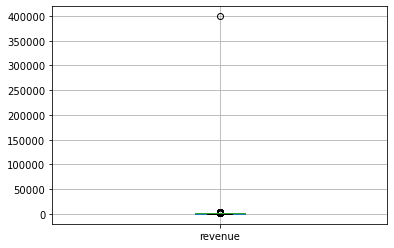

In [425]:
# доход с каждого юзера
orders_df.groupby('user_id')['revenue'].sum().reset_index().boxplot(column='revenue')


Видим, что есть выбросы. Пока избавимся от самого большого и рассмотрим боксплот ближе. 


<AxesSubplot:>

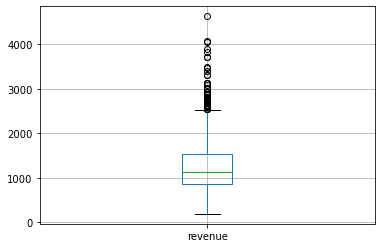

In [426]:
revenue1 = orders_df.groupby('user_id')['revenue'].sum().reset_index()
revenue1 = revenue1[revenue1['revenue']<50000]
revenue1.boxplot(column='revenue')


Видим, что после примерно 2500 начинаются выбросы. Мы можем вручную почистить, а можем воспользоваться формулой и отсечь, то, что меньше Q3+1.5*IQR. 
Для данного случая будет быстрее определить выбросы на глаз по графику, то есть отсечь юзеров, которые купили заказов больше чем на 2500 р.



Дополнительно по каждому варианту посмотрим на медиану, медиана не чувствительна к выбросам, но мы не можем использовать параметрические стат. тесты с медианой, так как они работают только на средних значениях и пропорциях. 


0


<AxesSubplot:>

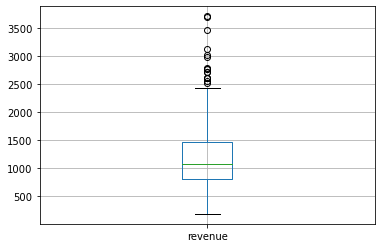

In [427]:
# revenue1.boxplot(column='revenue')
r0 = orders_df[orders_df['exp_group']==0].groupby('user_id')['revenue'].sum().reset_index()
r1 = orders_df[orders_df['exp_group']==1].groupby('user_id')['revenue'].sum().reset_index()

print(0)
display(r0[r0['revenue']<50000].boxplot(column='revenue'))




1


<AxesSubplot:>

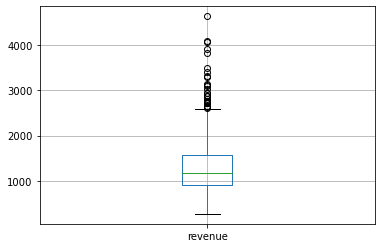

In [428]:
print(1)
display(r1[r1['revenue']<50000].boxplot(column='revenue'))


Медианный доход с юзера в тестовой версии выше, так что есть основания предполагать, что средний доход на юзера в тестовой версии действительно стал выше. 


Начнем считать неденежные метрики. Поэтому пострим таблицs с выбросами. Исключим только лишь пользователей, чей доход более 50 000 р. 


In [429]:
users_with_outlier = revenue1[revenue1['revenue']>50000]['user_id'].unique()
users_df = users_df[~users_df['user_id'].isin(users_with_outlier)]
orders_df = orders_df[~orders_df['user_id'].isin(users_with_outlier)]
funnel_df = funnel_df[~funnel_df['user_id'].isin(users_with_outlier)]





In [430]:
res = users_df.groupby(['exp_group']).agg({
    'user_id': 'nunique'
}).reset_index().rename(columns = {'user_id':'users'})
res['%GT'] = (res['users']/res['users'].sum())*100

# Посчитаем кол-во заказов
orders_count = orders_df.groupby('exp_group')['order_id'].count().reset_index().rename(columns = {'order_id':'orders'})
res = res.merge(orders_count, on = 'exp_group', how='inner')

# Посчитаем кол-во юзеров с заказами
users_orders_count = orders_df.groupby('exp_group')['user_id'].nunique().reset_index().rename(columns = {'user_id':'order_users'})
res = res.merge(users_orders_count, on = 'exp_group', how='inner')

# посчитаем кол-во юзеров с открытием карточки товара
view_item_users = funnel_df[~funnel_df['view_item'].isna()].groupby('exp_group')['user_id'].nunique().reset_index().rename(columns={'user_id':'view_item_users'})
res = res.merge(view_item_users, on='exp_group', how='inner')

# посчитаем юзеров с открытием чекаута
checkout_users = funnel_df[~funnel_df['checkout'].isna()].groupby('exp_group')['user_id'].nunique().reset_index().rename(columns={'user_id':'checkout_users'})
res = res.merge(checkout_users, on='exp_group', how='inner')



Теперь начнем считать денежные показатели. Для этого мы избавимся от выбросов - удилим из выборки юзеров, чей доход больше 2500. 




In [431]:
print('Количество юзеров с выбросами: ', len(revenue1[revenue1['revenue']>2500]))


Количество юзеров с выбросами:  53


In [432]:
users_with_outlier = revenue1[revenue1['revenue']>2500]['user_id'].unique()
users_df_no_outlier = users_df[~users_df['user_id'].isin(users_with_outlier)]
orders_df_no_outlier = orders_df[~orders_df['user_id'].isin(users_with_outlier)]
funnel_df_no_outlier = funnel_df[~funnel_df['user_id'].isin(users_with_outlier)]




In [433]:
# юзеры 
users_count = users_df_no_outlier.groupby('exp_group')['user_id'].count().reset_index().rename(columns={'user_id':'users_withaut_outlier'})
res = res.merge(users_count, on = 'exp_group', how='inner')

# заказы
orders_count = orders_df_no_outlier.groupby('exp_group')['order_id'].count().reset_index().rename(columns = {'order_id':'orders_withaut_outlier'})
res = res.merge(orders_count, on = 'exp_group', how='inner')

# Посчитаем кол-во юзеров с заказами
users_orders_count = orders_df_no_outlier.groupby('exp_group')['user_id'].nunique().reset_index().rename(columns = {'user_id':'order_users_withaut_outlier'})
res = res.merge(users_orders_count, on = 'exp_group', how='inner')

# доход 
revenue = orders_df_no_outlier.groupby('exp_group')['revenue'].sum().reset_index()
res = res.merge(revenue, on='exp_group', how='inner')




In [434]:
# относительные показатели
res['CR в оформление заказа'] = (res['orders']/res['users'])*100
res['CR в уникальное оформление заказа'] = (res['order_users'] / res['users'])*100
res['Частота заказов на пользователя'] = res['orders'] / res['order_users']
res['CR в заказ из чекаута'] = (res['orders'] / res['checkout_users'])*100
res['CR в заказ из просмотра карточки товара'] = (res['orders'] / res['view_item_users'])*100
res['ARPU'] = res['revenue'] / res['users_withaut_outlier']
res['ARPPU'] = res['revenue'] / res['order_users_withaut_outlier']
res['AOV'] = res['revenue'] / res['orders_withaut_outlier']


res_abs = res[['exp_group', 'users', 'users_withaut_outlier', 'orders', 'orders_withaut_outlier', 'order_users', 'order_users_withaut_outlier', 'view_item_users', 'checkout_users', 'revenue']]
res_relative = res[['exp_group', '%GT', 'CR в оформление заказа', 'CR в уникальное оформление заказа', 'Частота заказов на пользователя', 'CR в заказ из чекаута', 'CR в заказ из просмотра карточки товара', 'ARPU', 'ARPPU', 'AOV']]

res_abs_T = res_abs.T
res_abs_T.columns = res_abs_T.iloc[0]
res_abs_T = res_abs_T.iloc[1:]

res_res_relative_T = res_relative.T
res_res_relative_T.columns = res_res_relative_T.iloc[0]
res_res_relative_T = res_res_relative_T.iloc[1:]
res_res_relative_T = res_res_relative_T.rename(columns= {1.0:1, 0.0:0})
res_res_relative_T['%_delta'] = (100/res_res_relative_T[0])*res_res_relative_T[1]-100

display(res_abs_T)
display(res_res_relative_T)




exp_group,0,1
users,10284,10546
users_withaut_outlier,10268,10509
orders,1044,1097
orders_withaut_outlier,1017,1029
order_users,1003,1038
order_users_withaut_outlier,987,1001
view_item_users,8029,8396
checkout_users,3109,3244
revenue,1520776,1225153


exp_group,0,1,%_delta
%GT,49.371099,50.628901,2.547647
CR в оформление заказа,10.151692,10.402048,2.466153
CR в уникальное оформление заказа,9.753014,9.842594,0.918485
Частота заказов на пользователя,1.040877,1.056840,1.533582
CR в заказ из чекаута,33.579929,33.816276,0.703834
CR в заказ из просмотра карточки товара,13.002865,13.065746,0.483593
ARPU,148.108298,116.581311,-21.286442
ARPPU,1540.806484,1223.929071,-20.565685
AOV,1495.354966,1190.624879,-20.378445


Получили метрики, где при подсчете денежных показателей мы исключали выбросы. 
Что можно сказать: 
1. Гипотеза об увеличении конверсии в заказ на 10% не подтверждается точно, так как CR в оформление заказа + 2%. 
2. Гипотеза об увеличении дохода не подтверждается, так как ARPU упал на 21%. 
3. Остальные конверсии и частота тоже практически не изменились. 
4. ARPPU и AOV также упали на 20%. 
5. Даже не проверяя разницу в показателях на стат. значимость, можно сказать, что в конверсиях мы ничего не изменили, а в денежных метриках предположительно стало хуже. Возможно, новый формат промо-акций подразумевал увеличенную скидку. Если это так, то результаты логичные - в количестве заказов ничего не изменилось, но так как товары стали дешевле, доходность с них упала. 

Что дальше? 
- Честно говоря, я пишу этот код ночью и ужасно устала и у меня нет сил на проверку стат гипотез)) 
- Данных у нас вполне достаточно, поэтому для проверки наличия статистически значимой разницы для средний и проворций мы можем использовать T-test и z-критерий. 
- Расскажу как будем проверять статистическую значимость: 
    - По конверсиям и частоте мы итак видим, что разницы нет, и без тестов видно. Эти метрики можно дополнительно проверить с помощью T-теста и z-критерия для пропорций. 
    - Что касается ARPU, ARPPU и AOV, то здесь нужно протестировать для того, чтобы убедится в том, что действительно стало хуже на 20%. Для этого можно воспользоваться T-тестом. Дополнительно нарисовать график по дням и график со значением p-value по дням. Если мы увидим, что p-value становится меньше изо дня в день, то это верный признак того, что по деньгам мы действительно проседаем. 
    - Как я уже писала выше, нужно дополнительно расчитать денежные показатели и метрики с выбросами и провеси U-тест Манна-Уитни. Он не чувствителен к выбросам, но у него меньше мощность, нежели у параметрических тестов. 
    
<b>Итог</b>: Гипотеза не подтверждается. В конверсии в заказ изменений нет, а в доходности скорее всего есть уменьшение на 20% (это нужно покрыть стат. тестом). 




